# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import numpy as np

# Create two new dataframes
north_df = pd.read_csv('NorthCallCenter.csv')
south_df = pd.read_csv('SouthCallCenter.csv')

In [2]:
north_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1


In [3]:
south_df.head()

,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. In the code blocks below enter the code used to solve the question.  At the end of the section record your answers by double clicking where asked.

In [4]:
print(north_df.info())
print('\n')
print(south_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             245 non-null    int64  
 1   Branch                 245 non-null    object 
 2   Call Purpose           245 non-null    object 
 3   Time Block             245 non-null    object 
 4   Incoming or Outgoing   245 non-null    object 
 5   Queue                  245 non-null    object 
 6   Rep ID                 245 non-null    object 
 7   Sale                   245 non-null    object 
 8   Lost Call              245 non-null    int64  
 9   Abandoned              245 non-null    int64  
 10  Busy Minutes           245 non-null    int64  
 11  Not Ready Minutes      245 non-null    int64  
 12  Incoming Wait Time     82 non-null     float64
 13  During Call Wait Time  245 non-null    int64  
 14  Calls                  245 non-null    int64  
dtypes: flo

#### EDA Question 1A:  How many reps are in the North branch?  

In [5]:
#Code Used:
north_df['Rep ID'].nunique()

9

#### EDA Question 1B:  How many reps are in the South branch?  

In [6]:
#Code Used:
south_df['Rep ID'].nunique()

11

#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [7]:
#Code Used:
north_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean().round(2)

Busy Minutes             9.99
Not Ready Minutes        1.91
Incoming Wait Time       3.05
During Call Wait Time    2.97
dtype: float64

#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [8]:
#Code Used:
south_df[['Busy Minutes','Not Ready Minutes','Incoming Wait Time','During Call Wait Time']].mean().round(2)

Busy Minutes             10.05
Not Ready Minutes         1.91
Incoming Wait Time        3.00
During Call Wait Time     3.08
dtype: float64

#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [9]:
# Code Used:
time_block_count = (north_df['Time Block'].value_counts()+south_df['Time Block'].value_counts()).reindex(['9:00 AM', '10:00 AM','11:00 AM','12:00 PM', '1:00 PM','2:00 PM','3:00 PM', '4:00 PM', '5:00 PM'])
time_block_count

9:00 AM      10
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
Name: Time Block, dtype: int64

##### Record your answers for the EDA section by double clicking here:
- 1a) Reps in the North Branch = <font color='red'>**9**</font>
- 1b) Reps in the South Branch = <font color='red'>**11**</font>


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = <font color='red'>**9.99**</font>
> - Not Ready Minutes = <font color='red'>**1.91**</font>
> - Incoming Wait Time = <font color='red'>**3.05**</font>
> - During Call Wait Time = <font color='red'>**2.97**</font>
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = <font color='red'>**10.05**</font>
> - Not Ready Minutes = <font color='red'>**1.91**</font>
> - Incoming Wait Time = <font color='red'>**3.00**</font>
> - During Call Wait Time = <font color='red'>**3.08**</font>
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = <font color='red'>**10**</font>
> - 10:00AM  = <font color='red'>**99**</font>
> - 11:00AM  = <font color='red'>**56**</font>
> - 12:00PM  = <font color='red'>**120**</font>
> - 1:00PM   = <font color='red'>**40**</font>
> - 2:00PM   = <font color='red'>**65**</font>
> - 3:00PM   = <font color='red'>**73**</font>
> - 4:00PM   = <font color='red'>**53**</font>
> - 5:00PM   = <font color='red'>**43**</font>



<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?
##### Record your answer by double clicking here:
> <font color='red'>**Incoming Wait Time is missing for 163 records in the North Branch and 188 records for the South Branch. I would gain some clarification on the data set and how the data was collected.**</font><br>
<font color='red'>* **Does a null value indicate that the incoming wait time was zero minutes? If so, I would change those null values to '0'.**</font><br>
<font color='red'>* **Does a null value indicate that the incoming wait time was unknown? If so, I would omit Incoming Wait Time from my analysis. With more than 50% of values missing from both datasets, any analyses done would not be very informative.**</font>

In [10]:
# Code Used
# Add Additional Cells as needed.
north_df_null = north_df.isnull().sum()
south_df_null = south_df.isnull().sum()
percent_north = north_df.isnull().sum()/len(north_df)*100
percent_south = south_df.isnull().sum()/len(north_df)*100

null_data = pd.concat([north_df_null, percent_north, south_df_null, percent_south], axis=1)
null_data.columns = ['North','Percent North', 'South', 'Percent South']

null_data

,North,Percent North,South,Percent South
Unnamed: 0,0,0.000000,0,0.000000
Branch,0,0.000000,0,0.000000
Call Purpose,0,0.000000,0,0.000000
Time Block,0,0.000000,0,0.000000
Incoming or Outgoing,0,0.000000,0,0.000000
Queue,0,0.000000,0,0.000000
Rep ID,0,0.000000,0,0.000000
Sale,0,0.000000,0,0.000000
Lost Call,0,0.000000,0,0.000000
Abandoned,0,0.000000,0,0.000000


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?
##### Record your answer by double clicking here:
> <font color='red'>**Some of the "YES" values have spaces in front of them, some do not. Used ".strip()" to strip the spaces from the values.**</font>

In [11]:
#Code Used
# Add Additional Cells as needed.
print(north_df['Sale'].value_counts())
print('\n')

new_north = north_df.drop(north_df[(north_df['Sale'] == 'NO')].index, inplace=False)
print(new_north['Sale'])

NO      234
YES      10
YES       1
Name: Sale, dtype: int64


19     YES 
40      YES
47      YES
67      YES
69      YES
86      YES
87      YES
99      YES
108     YES
220     YES
227     YES
Name: Sale, dtype: object


In [12]:
north_df['Sale'] = north_df['Sale'].str.strip()
new_north_2 = north_df.drop(north_df[(north_df['Sale'] == 'NO')].index, inplace=False)
print(new_north_2['Sale'])
print('\n')
print(north_df['Sale'].value_counts())

19     YES
40     YES
47     YES
67     YES
69     YES
86     YES
87     YES
99     YES
108    YES
220    YES
227    YES
Name: Sale, dtype: object


NO     234
YES     11
Name: Sale, dtype: int64


#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?
##### Record your answer by double clicking here:
> <font color='red'>**Yes, two records that are duplicates. Used ".drop_duplicates()" to remove duplicates.**</font>

In [13]:
#Code Used
# Add Additional Cells as needed.
north_df_dedupped = north_df.drop('Unnamed: 0', axis=1).drop_duplicates()
print(len(north_df))
print(len(north_df_dedupped))

245
243


#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?
##### Record your answer by double clicking here:
> <font color='red'>**Yes, the first column (unlabeled/unnamed) is unnecessary. Column can be deleted.**</font>

In [14]:
#Code Used
# Add Additional Cells as needed.
print(north_df['Calls'].value_counts())
print('\n')
print(south_df['Calls'].value_counts())

north_df_cleaned = north_df_dedupped
south_df_cleaned = south_df.drop(['Unnamed: 0'], axis=1)

1    245
Name: Calls, dtype: int64


1    314
Name: Calls, dtype: int64


In [15]:
north_df_cleaned

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,North,Product Support,5:00 PM,Outgoing,B,Brent,NO,0,0,10,2,NaN,3,1
241,North,Product Support,5:00 PM,Outgoing,A,Joe,NO,0,0,8,3,NaN,2,1
242,North,Product Support,5:00 PM,Outgoing,A,Amanda,NO,0,0,12,1,NaN,2,1
243,North,Product Support,5:00 PM,Outgoing,A,Cam,NO,0,0,11,2,NaN,2,1


In [16]:
south_df_cleaned

,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,South,Sales Support,10:00 AM,Incoming,D,Kate,NO,0,0,9,1,1.0,2,1
1,South,Sales Support,10:00 AM,Incoming,C,Eric,NO,0,0,8,2,1.0,4,1
2,South,Sales Support,10:00 AM,Incoming,C,Susan,NO,0,0,10,2,1.0,4,1
3,South,Sales Support,10:00 AM,Incoming,C,Alice,NO,0,0,12,1,1.0,3,1
4,South,Sales Support,12:00 PM,Incoming,C,Sandy,NO,0,0,8,3,1.0,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer by double clicking the below cell.

In [17]:
# Create dataframe for the entire company named df
df = north_df_cleaned.append(south_df_cleaned, ignore_index=True)
df

C:\Users\JChou\AppData\Local\Temp\ipykernel_5948\867545553.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = north_df_cleaned.append(south_df_cleaned, ignore_index=True)


,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
552,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
553,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
554,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
555,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

##### Record your answer by double clicking here:
Rep with the hightest number of calls and their total calls:<br>
* North Branch = <font color='red'>**Brent, 37 calls**</font><br>
* South Branch = <font color='red'>**Eric, 35 calls**</font>


In [18]:
# Code Used
# Add Additional Cells as needed.
df_calls_by_branch_repid = df.groupby(['Branch','Rep ID']).agg({'Calls':'sum'})
df_calls_by_branch_repid.sort_values(by='Calls', ascending=False)

Calls
Branch Rep ID       
North  Brent      37
South  Eric       35
       Randy      33
       Sandy      32
       Helga      31
North  Lilly      30
       Duke       29
       Todd       29
South  Kate       29
       George     29
       Karl       28
       Josh       26
       Susan      26
North  Joe        25
South  Sharon     25
North  Xander     24
       Cam        24
       Andy       23
       Amanda     22
South  Alice      20

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?
##### Record your answer by double clicking here:
Average Call Abandonment Rates (round to the nearest hundredth):<br>
* North Branch = <font color='red'>**2.88%**</font>
* South Branch = <font color='red'>**1.27%**</font>
* Company Wide = <font color='red'>**1.97%**</font><br><br>
Do any of these fall out of the optimal range of 2-5%?<br>
<font color='red'>**Yes. South branch and company wide both had lower abandonment rates than 2%. North branch had higher rates, but is still within the optimal range.**</font>

In [19]:
# Code Used
# Add Additional Cells as needed.
df_abandoned_calls = df.groupby(['Branch']).agg({'Abandoned':'sum','Calls':'sum'})
df_abandoned_calls.loc['Company Wide'] = [df['Abandoned'].sum(), df['Calls'].sum()]
df_abandoned_calls['Percentage'] = (df_abandoned_calls['Abandoned']/df_abandoned_calls['Calls']*100).round(2)
df_abandoned_calls

,Abandoned,Calls,Percentage
Branch,,,
North,7,243,2.88
South,4,314,1.27
Company Wide,11,557,1.97


#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?
##### Record your answer by double clicking here:
Percentage of calls answered within 2 seconds, include # of calls:

* North Branch = <font color='red'>**13.48%, 33 calls**</font>
* South Branch = <font color='red'>**15.29%, 48 calls**</font>
* Company Wide = <font color='red'>**14.54%, 81 calls**</font>

In [20]:
# Code Used
# Add Additional Cells as needed.
df_service_level = df[df['Incoming Wait Time'] <=2].groupby(['Branch']).agg({'Calls':'sum'})
df_service_level['Total Calls'] = df.groupby(['Branch']).agg({'Calls':'sum'})
df_service_level.loc['Company Wide'] = [(df[df['Incoming Wait Time'] <=2])['Calls'].sum(), df['Calls'].sum()]
df_service_level['Percentage'] = (df_service_level['Calls']/df_service_level['Total Calls']*100).round(2)
df_service_level

,Calls,Total Calls,Percentage
Branch,,,
North,33,243,13.58
South,48,314,15.29
Company Wide,81,557,14.54


#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?
##### Record your answer by double clicking here:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = <font color='red'>**3.04**</font>
- South Branch in seconds = <font color='red'>**3.00**</font>
- Company Wide in seconds = <font color='red'>**3.01**</font>


In [24]:
# Code Used 
df_average_speed_of_answer = df.groupby(['Branch']).agg({'Incoming Wait Time':'mean'})
df_average_speed_of_answer.loc['Company Wide'] = df['Incoming Wait Time'].mean()
df_average_speed_of_answer

,Incoming Wait Time
Branch,
North,3.037037
South,3.000000
Company Wide,3.014493


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?
##### Record your answer by double clicking here:

> Chart style you chose and why:<br>
<font color='red'>**Column chart for easy comparison of one variable (Abandonment Rate) for different categories (Queues).**</font>

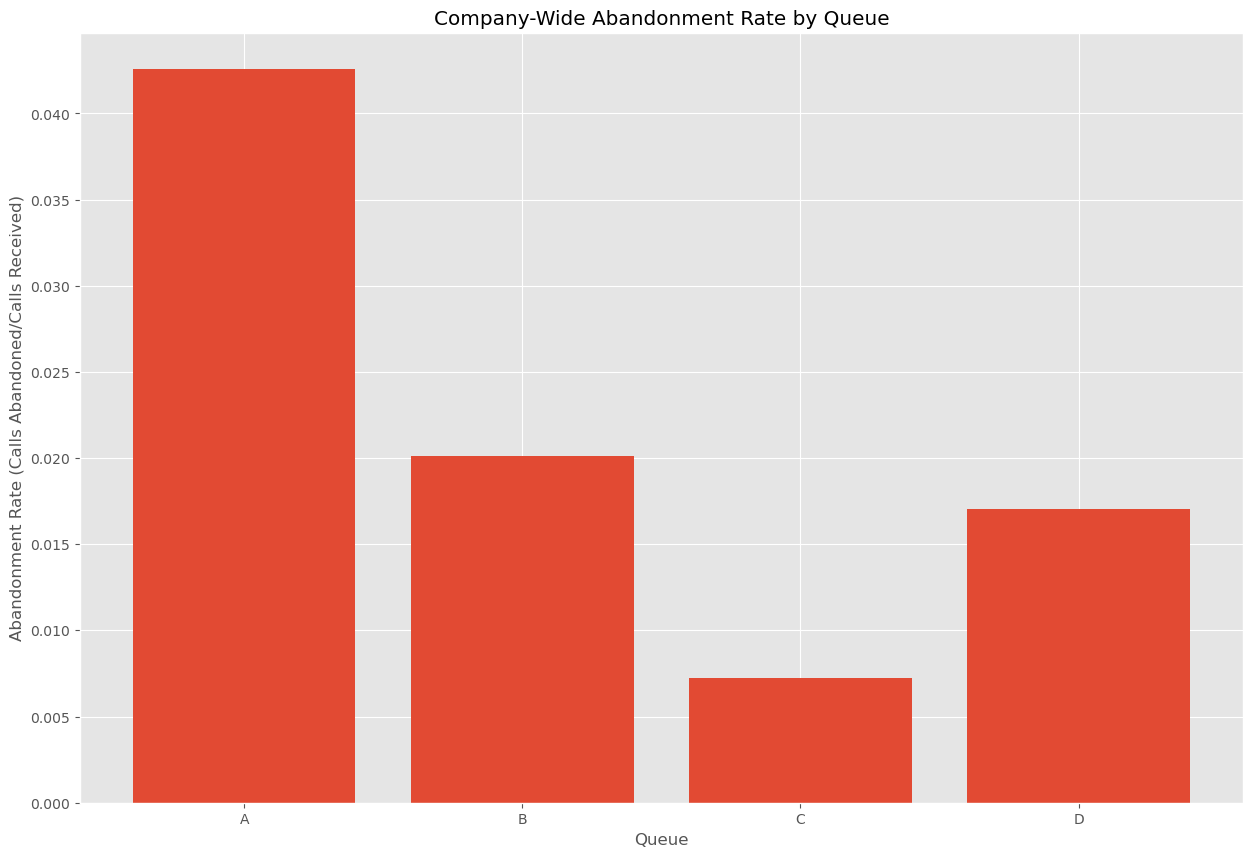

In [89]:
# Create visualization 1 here
# Import any additional libraries needed with alias
from matplotlib import style
plt.rcParams['figure.figsize'] = (15,10)


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

    
#Your Code Here:

plt.bar(queues, abandonment_rates.values())
plt.xlabel('Queue')
plt.ylabel('Abandonment Rate (Calls Abandoned/Calls Received)')
plt.title('Company-Wide Abandonment Rate by Queue')
plt.show()

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?
##### Record your answer by double clicking here:

> Chart style you chose and why: <font color='red'>**Scatter plot. Not ideal, but allows the viewing of two different variables and two differnet ranges of axes at once, along with the relationship between them (inversely proportional). Presenting this way allows the viewer to easily and quickly see which rep is doing well (Brent).**</font>

C:\Users\JChou\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


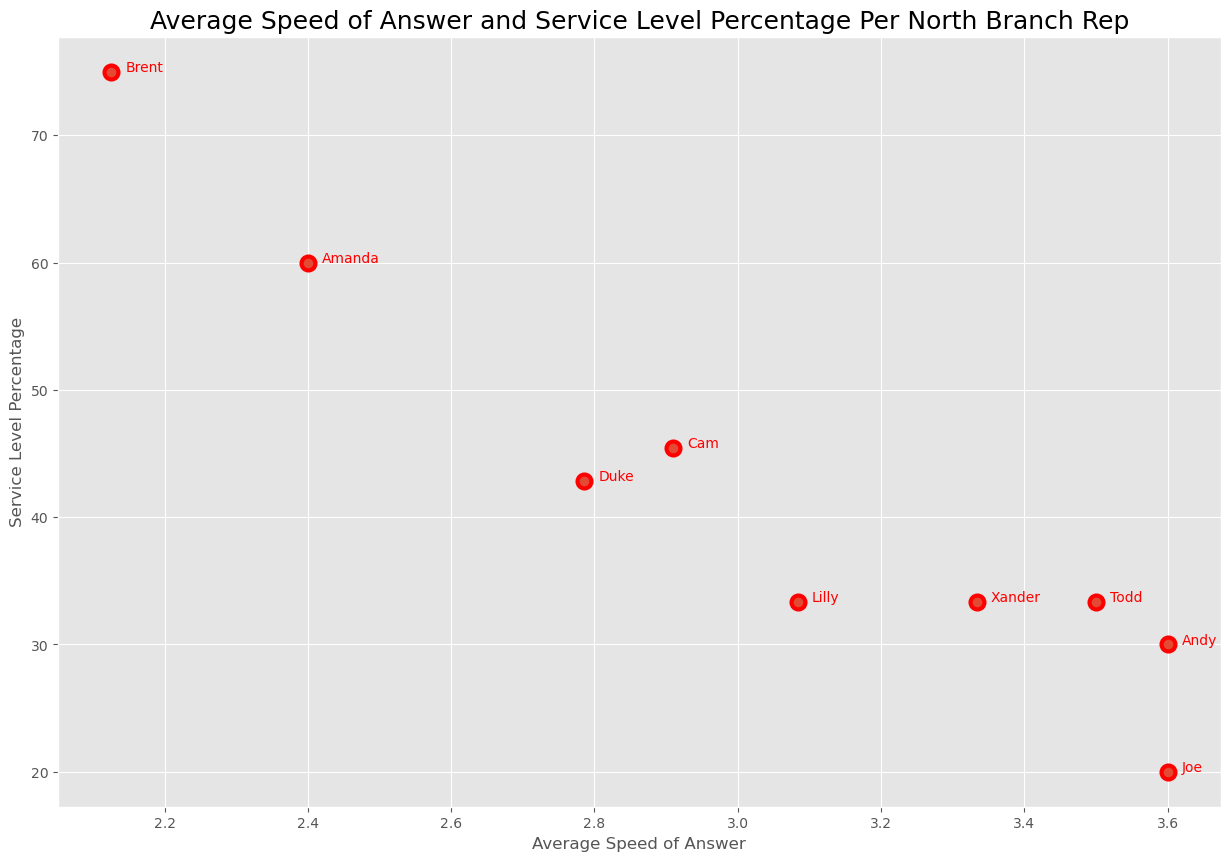

In [231]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level Percentage"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:
north_plt.set_index('Rep ID', inplace = True)
rep_id_stats = north_plt.join(service_level)
sns.scatterplot('Incoming Wait Time','Service Level Percentage', data = rep_id_stats, s = 100, linewidth = 3, edgecolor = 'Red')
for i in range(rep_id_stats.shape[0]):
 plt.text(x=rep_id_stats['Incoming Wait Time'][i]+0.02,y=rep_id_stats['Service Level Percentage'][i]+0.02,s=rep_id_stats.index[i], 
          fontdict=dict(color='red',size=10))
plt.title('Average Speed of Answer and Service Level Percentage Per North Branch Rep', color = 'black', fontsize = 18)
plt.xlabel('Average Speed of Answer')
plt.savefig('scatter.png')
plt.show()

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?
##### Record your answer by double clicking here:

> Chart style you chose and why: <font color='red'>**Grouped column chart for easy comparison for different categories (Complaints, Sales Support, Product Support). Grouped nature allows for showing Outgoing vs. Incoming calls.**</font>

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                122
                 Incoming                 74
Name: Incoming or Outgoing, dtype: int64


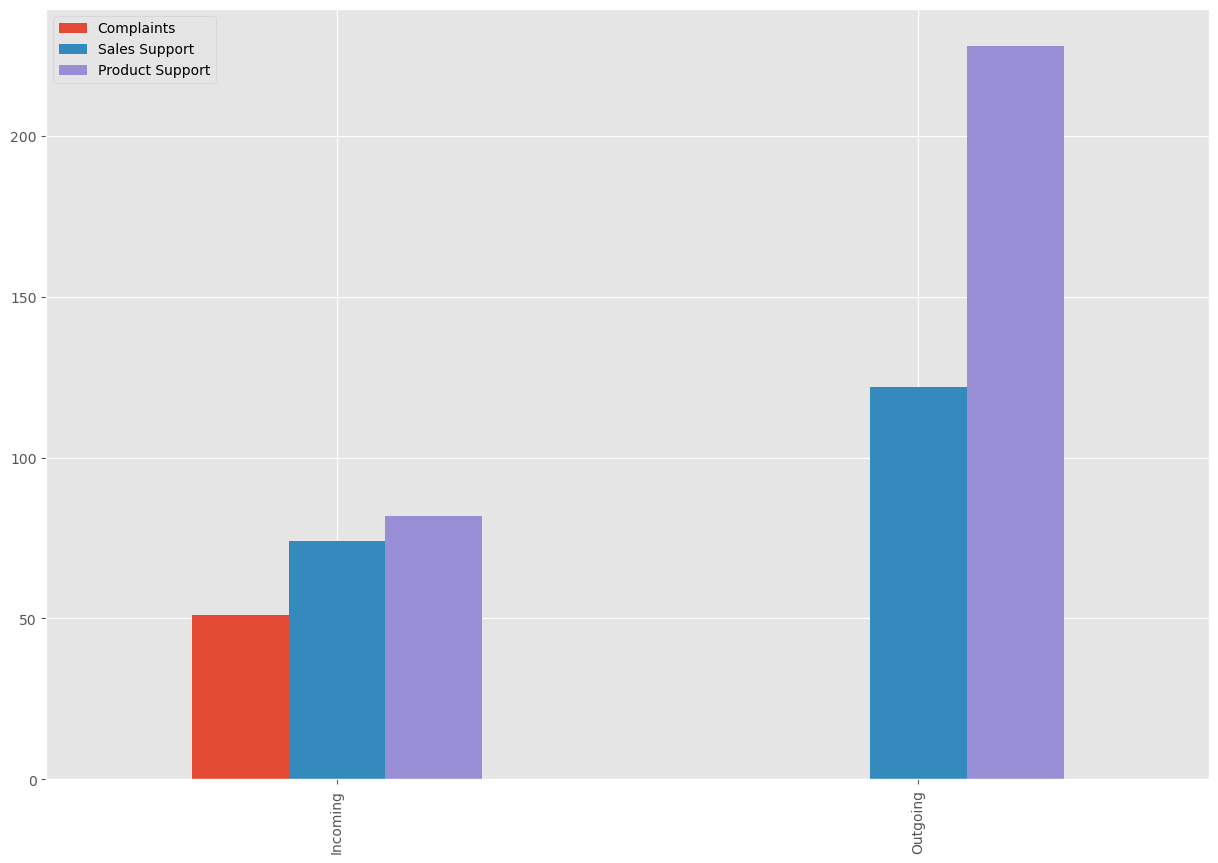

In [243]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
call_purpose = {
    'Complaints': complaints,
    'Sales Support': sales_support,
    'Product Support': product_support,
}
pd.DataFrame(call_purpose).plot(kind='bar')
plt.show()

<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer by double clicking here:
> Your Answer: <font color = 'red'>**The South branch is operating more efficiently. It had a lower average abandonment rate at 1.27% (vs. 2.88% for North branch). It had a higher service level at 15.29% (vs. 13.48% for North branch). It was, on average, quicker to respond with an average speed of answer of 3.00 minutes (vs. 3.04 minutes for North branch.)**</font>

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer by double clicking here:
> Your Answer: <font color='red'>**The North branch would benefit from extra help. It is operating with 2 fewer reps than South branch, the average speed of answer is slower, and customers are abandoning their attempts to connect to a rep at a much higher rate. The average Not Ready time is the same for both branches, so it's not due to the North branch reps doing something else when they should be working.**</font>

#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer by double clicking here:
> Your Answer: <font color='red'>**Customer satisfaction. Just because South branch is moving to calls faster doesn't mean their customers are more satisfied with the interaction.**</font>


<span style="background-color:orangered; color:orangered;">- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -</span>

## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer by double clicking here:

> Chart style you chose and why: 

In [245]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:


# Use groupby and get_group to select which call purpose to plot:
